# Proyecto final
## Diego Aranda Lozano
## GitHub:


# Powelifting
El powerlifting o levantamiento de potencia es un deporte de fuerza que consiste en la realización de tres ejercicios de levantamiento de peso: la sentadilla, el press de banca y el peso muerto. 

La competición de levantamiento de potencia se desarrolla de la siguiente manera:

A cada competidor se le permiten tres intentos en cada tipo de levantamiento, dependiendo de su prestigio y de la organización en la que compiten. El mejor de sus intentos válidos es el que cuenta para el total de la competición. Si dos o más competidores consiguen el mismo total, el levantador con menor peso corporal se coloca por encima de levantadores más pesados.

Las comparaciones entre levantadores y sus puntuaciones a través de distintas categorías de peso pueden hacerse también utilizando sistemas de desventaja (handicap) como la Fórmula de Wilks



 El conjunto de datos contiene información acerca de los levantadores individuales, incluyendo su nombre, edad, peso corporal, equipo utilizado, mejor levantamiento, posición y Wilks. Como alguien que disfruta del levantamiento de pesas y el ejercicio regular, personalmente encuentro estos datos interesantes para explorar.

El dataset lo podemos encontrar en Kagge, en la siguiente liga: https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database.
 Para poder descargar el dataset debemos cargar en esta notebook el archvo **kaggle.json** el cual vendrá anexo en el github


In [1]:
''' trabajaremos con una dataset de kaggle, así que instalaremos lo necesario para poder conectar el .csv de kaggle con colab'''
!pip install kaggle
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Data manipulation libraries
import pandas as pd
import numpy as np
import opendatasets as od
# Data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [3]:
'''Downloading the dataset'''
od.download(
    "https://www.kaggle.com/datasets/open-powerlifting/powerlifting-database?resource=download&select=openpowerlifting.csv")

Skipping, found downloaded files in "./powerlifting-database" (use force=True to force download)


In [4]:
'''' leyendo el archivo.csv'''
df = pd.read_csv('/content/powerlifting-database/openpowerlifting.csv')

<ipython-input-4-5361a091ddb7>:2: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/powerlifting-database/openpowerlifting.csv')


## Empezaremos a explorar el dataset

In [5]:
#Dimensiones
df.shape

(1423354, 37)

In [6]:
#Veamos el encabezado:
df.head()


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,McCulloch,Glossbrenner,IPFPoints,Tested,Country,Federation,Date,MeetCountry,MeetState,MeetName
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,324.16,286.42,511.15,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,378.07,334.16,595.65,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,38.56,34.12,313.97,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,345.61,305.37,547.04,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,338.91,274.56,550.08,NaN,NaN,GPC-AUS,2018-10-27,Australia,VIC,Melbourne Cup


In [7]:
#Qué tipos de datos tenemos?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423354 entries, 0 to 1423353
Data columns (total 37 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1423354 non-null  object 
 1   Sex              1423354 non-null  object 
 2   Event            1423354 non-null  object 
 3   Equipment        1423354 non-null  object 
 4   Age              757527 non-null   float64
 5   AgeClass         786800 non-null   object 
 6   Division         1415176 non-null  object 
 7   BodyweightKg     1406622 non-null  float64
 8   WeightClassKg    1410042 non-null  object 
 9   Squat1Kg         337580 non-null   float64
 10  Squat2Kg         333349 non-null   float64
 11  Squat3Kg         323842 non-null   float64
 12  Squat4Kg         3696 non-null     float64
 13  Best3SquatKg     1031450 non-null  float64
 14  Bench1Kg         499779 non-null   float64
 15  Bench2Kg         493486 non-null   float64
 16  Bench3Kg         4

Nos interesan los datos competitivos de los atletas, tales 

como division, marcas, equipamento,pesos levantados, entonces eliminaremos aquellos datos que no nos proporcionen nada relacionado.

In [8]:
#con este comando modificaremos el DF, descartando todas las columnas a partir de la columna 10
df= df.iloc[:,:-10]
#Eliminamos la columna event
df.drop(['Event'], axis=1)


,Name,Sex,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,Bench4Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Deadlift4Kg,Best3DeadliftKg,TotalKg,Place,Wilks
0,Abbie Murphy,F,Wraps,29.0,24-34,F-OR,59.8,60,80.0,92.5,...,NaN,55.0,110.0,120.0,130.0,NaN,130.0,290.0,4,324.16
1,Abbie Tuong,F,Wraps,29.0,24-34,F-OR,58.5,60,100.0,110.0,...,NaN,67.5,130.0,140.0,145.0,NaN,145.0,332.5,2,378.07
2,Ainslee Hooper,F,Raw,40.0,40-44,F-OR,55.4,56,NaN,NaN,...,NaN,32.5,NaN,NaN,NaN,NaN,NaN,32.5,1,38.56
3,Amy Moldenhauer,F,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,-105.0,...,NaN,72.5,132.5,-140.0,-140.0,NaN,132.5,310.0,3,345.61
4,Andrea Rowan,F,Wraps,45.0,45-49,F-OR,104.0,110,120.0,130.0,...,NaN,80.0,150.0,160.0,170.0,NaN,170.0,390.0,3,321.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423349,Marian Cafalik,M,Raw,60.5,60-64,Masters 2,73.5,74,160.0,170.0,...,NaN,87.5,180.0,190.0,-195.0,NaN,190.0,452.5,4,327.07
1423350,Marian Piwowarczyk,M,Raw,55.5,55-59,Masters 2,63.5,66,90.0,100.0,...,NaN,95.0,140.0,160.0,170.0,NaN,170.0,375.0,5,304.16
1423351,Andrzej Bryniarski,M,Raw,62.5,60-64,Masters 2,94.4,105,140.0,150.0,...,NaN,100.0,160.0,170.0,180.0,NaN,180.0,440.0,6,274.48
1423352,Stanisław Goroczko,M,Raw,63.5,60-64,Masters 2,80.8,83,-165.0,-165.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DQ,NaN


A simple vista podemos notar que hay columnas con datos faltantes,las eliminaremos:

In [9]:
df.drop(['Squat4Kg','Bench4Kg','Deadlift4Kg'],axis=1,inplace=True)



In [10]:
df.head()


,Name,Sex,Event,Equipment,Age,AgeClass,Division,BodyweightKg,WeightClassKg,Squat1Kg,...,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks
0,Abbie Murphy,F,SBD,Wraps,29.0,24-34,F-OR,59.8,60,80.0,...,50.0,55.0,55.0,110.0,120.0,130.0,130.0,290.0,4,324.16
1,Abbie Tuong,F,SBD,Wraps,29.0,24-34,F-OR,58.5,60,100.0,...,62.5,67.5,67.5,130.0,140.0,145.0,145.0,332.5,2,378.07
2,Ainslee Hooper,F,B,Raw,40.0,40-44,F-OR,55.4,56,NaN,...,32.5,-35.0,32.5,NaN,NaN,NaN,NaN,32.5,1,38.56
3,Amy Moldenhauer,F,SBD,Wraps,23.0,20-23,F-OR,60.0,60,-105.0,...,72.5,-75.0,72.5,132.5,-140.0,-140.0,132.5,310.0,3,345.61
4,Andrea Rowan,F,SBD,Wraps,45.0,45-49,F-OR,104.0,110,120.0,...,75.0,80.0,80.0,150.0,160.0,170.0,170.0,390.0,3,321.25


Veamos que otros datos faltan:


In [11]:
nan_counts = df.isna().sum()
print(nan_counts)

Name                     0
Sex                      0
Event                    0
Equipment                0
Age                 665827
AgeClass            636554
Division              8178
BodyweightKg         16732
WeightClassKg        13312
Squat1Kg           1085774
Squat2Kg           1090005
Squat3Kg           1099512
Best3SquatKg        391904
Bench1Kg            923575
Bench2Kg            929868
Bench3Kg            944869
Best3BenchKg        147173
Deadlift1Kg        1059810
Deadlift2Kg        1067331
Deadlift3Kg        1083407
Best3DeadliftKg     341546
TotalKg             110170
Place                    0
Wilks               118947
dtype: int64


Hay celdas con NaN que podemos llenar, simplemente infierendo cosas: todas las columnas que indican pesos levantados (squat, bech, deadlift, Best 3 y total) sin pérdida de generalidad podemos llenarlas con ceros, ya que al hacer un levantamiendo incorrecto, un faul o no haberse presentado a la prueba, podemos asumir que se levantaron cero kilos.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1423354 entries, 0 to 1423353
Data columns (total 24 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Name             1423354 non-null  object 
 1   Sex              1423354 non-null  object 
 2   Event            1423354 non-null  object 
 3   Equipment        1423354 non-null  object 
 4   Age              757527 non-null   float64
 5   AgeClass         786800 non-null   object 
 6   Division         1415176 non-null  object 
 7   BodyweightKg     1406622 non-null  float64
 8   WeightClassKg    1410042 non-null  object 
 9   Squat1Kg         337580 non-null   float64
 10  Squat2Kg         333349 non-null   float64
 11  Squat3Kg         323842 non-null   float64
 12  Best3SquatKg     1031450 non-null  float64
 13  Bench1Kg         499779 non-null   float64
 14  Bench2Kg         493486 non-null   float64
 15  Bench3Kg         478485 non-null   float64
 16  Best3BenchKg     1

In [13]:
df.iloc[:, 9:22] = df.iloc[:, 9:22].fillna(value=0)

La columna 'Division' no nos da una información clara, veamos cuantos valores tiene:


In [14]:
print('Numero de divisiones únicas: ' + str(df['Division'].nunique()))

Numero de divisiones únicas: 4842


Esto es imposible,no existen tantas divisiones.
Teniendo en cuenta la cantidad de valores nulos que hay en la columna 'Age', probablemente no valga la pena crear una nueva columna para clasificar a los levantadores por edad. Sin embargo, es una buena práctica y de todos modos lo voy a hacer. \\
La clasificación por edades del levantador parece ser un poco más confusa oficialmente. Esta es la clasificación oficial de edad según la IWF: \\
http://www.iwf.net/weightlifting_/participants/



*   YOUTH: 13 – 17 years of age
*   JUNIOR: 15 – 20 years of age


*   SENIOR: ≥15 years of age
*   MASTERS: ≥35 years of age
Esto puede ser confuso porque un joven de 16 años puede competir como JUVENIL, JÚNIOR y SENIOR (aunque probablemente solo en una categoría a la vez, y con otros criterios desconocidos). Por falta de una mejor comprensión, crearé un sistema de clasificación que se lee de la siguiente manera...
*CHILD: < 13 years of age
*YOUTH: 13 – 17 years of age
*ADULT: 18 - 34 years of age
*MASTERS: ≥35 years of age





In [15]:
#Creamos una función para clasificar por edades
def age_class(x):
    if x < 13:
        return 'CHILD'
    if x >= 13 and x <= 17:
        return 'YOUTH'
    if x >= 18 and x <= 34:
        return 'ADULT'
    if x >= 35:
        return 'MASTERS'


Crearemos una nueva columna llamada Ageclass donde se llenará utlizizando la función age_class y descartaremos la columna Division

In [16]:
df['AgeClass'] = df['Age'].apply(age_class)
df.drop(['Division'], axis=1,inplace=True)

In [17]:
df.head
df.shape

(1423354, 23)

Además de la división por edades, también hay división por peso. \\
Estas son las categorías de peso según la IWF: \\
**Men Weight Classes**

* 56 kg (123 lb)


* 62 kg (137 lb)
* 69 kg (152 lb)
* 77 kg (170 lb)
* 85 kg (187 lb)
* 94 kg (207 lb)
* 105 kg (231 lb)
* 105 kg and over (231 lb+) 

**Women Weight Classes**

* 48 kg (106 lb)
* 53 kg (117 lb)
* 58 kg (128 lb)
* 63 kg (139 lb)
* 69 kg (152 lb)
* 75 kg (165 lb)
* 90 kg (198 lb)
* 90 kg and over (198 lb+)[1]

## Crearemos las divisiones por pesos Varonil y Femenil:

In [18]:
''' Definimos las funciones de asignasión de división'''
def male_weight_class(x):
    if x <= 56:
        return '56 Kg'
    if x <= 62 and x > 56:
        return '62 Kg'
    if x <= 69 and x > 62:
        return '69 Kg'
    if x <= 77 and x > 69:
        return '77 Kg'
    if x <= 85 and x > 77:
        return '85 Kg'
    if x <= 94 and x > 85:
        return '94 Kg'
    if x <= 105 and x > 94:
        return '105 Kg'
    if x > 105:
        return '105+ Kg'
        
def female_weight_class(x):
    if x <= 48:
        return '48 Kg'
    if x <= 53 and x > 48:
        return '53 Kg'
    if x <= 58 and x > 53:
        return '58 Kg'
    if x <= 63 and x > 58:
        return '63 Kg'
    if x <= 69 and x > 63:
        return '69 Kg'
    if x <= 75 and x > 69:
        return '75 Kg'
    if x <= 90 and x > 75:
        return '90 Kg'
    if x > 90:
        return '90+ Kg'

In [19]:
''' creamos dos df auxiliares que llenaremos con las funciones male_weight y female_weight'''
male = df[df['Sex']=='M']

female = df[df['Sex']=='F']

In [20]:
'''LLenamos los dataframes'''
male['WeightClassKg'] = male['BodyweightKg'].apply(male_weight_class)
female['WeightClassKg'] = female['BodyweightKg'].apply(female_weight_class)



<ipython-input-20-064a3c185046>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male['WeightClassKg'] = male['BodyweightKg'].apply(male_weight_class)
<ipython-input-20-064a3c185046>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female['WeightClassKg'] = female['BodyweightKg'].apply(female_weight_class)


In [21]:
df = pd.concat([male,female])

In [22]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks
41,Adrian Zwaan,M,SBD,Raw,80.0,MASTERS,82.1,85 Kg,80.0,90.0,...,67.5,72.5,72.5,130.0,137.5,145.0,145.0,317.5,11,213.32
42,Aiden Westrip,M,SBD,Wraps,28.0,ADULT,82.0,85 Kg,210.0,220.0,...,130.0,135.0,135.0,225.0,240.0,250.0,250.0,612.5,2,411.82
43,Andrew Fella,M,SBD,Wraps,27.0,ADULT,89.2,94 Kg,230.0,245.0,...,135.0,140.0,140.0,210.0,230.0,250.0,250.0,650.0,5,416.86
44,Andrew Yuile,M,SBD,Wraps,36.0,MASTERS,79.5,85 Kg,112.5,120.0,...,77.5,-80.0,77.5,125.0,135.0,142.5,142.5,345.0,9,236.47
45,Anthony Provenza,M,SBD,Wraps,34.0,ADULT,114.7,105+ Kg,-270.0,270.0,...,-195.0,-195.0,180.0,270.0,-300.0,-300.0,270.0,720.0,4,418.65


## Pesos negativos?
a simple vista, podemos notar que hay entradas negativas, estas físicamente no tienen sentido, verifiquemos cuales entradas son y las eliminaremos:


In [23]:
df[df['Best3BenchKg']<0].head(3)

,Name,Sex,Event,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks
309,Justin Faella,M,SBD,Wraps,30.0,ADULT,73.8,77 Kg,150.0,162.5,...,-100.0,0.0,-100.0,212.5,220.0,-227.5,220.0,0.0,DQ,NaN
3470,Brendan Hains,M,SBD,Multi-ply,44.0,MASTERS,95.1,105 Kg,250.0,270.0,...,-205.0,0.0,-205.0,240.0,260.0,-275.0,260.0,0.0,DQ,NaN
5607,Garth Bolitho,M,SBD,Wraps,33.0,ADULT,114.3,105+ Kg,215.0,240.0,...,-172.5,-172.5,-155.0,220.0,240.0,-252.5,240.0,0.0,DQ,NaN


In [24]:
#Make sure to only drop negatives. 

df = df[(df['Best3SquatKg'] >= 0)]
df = df[(df['Best3DeadliftKg'] >= 0) ]
df = df[(df['Best3BenchKg'] >= 0) ]

## Fuerza Relativa 
Los levantadores que pesan más tienden a levantar más peso también. Crearé algunas columnas más que reflejen cuántas veces un levantador de pesas puede levantar su propio peso. La fórmula es simplemente: \\

Mejor levantamiento en kg / peso corporal = fuerza relativa

Al ver cuántas veces un levantador puede levantar su propio peso, obtendremos otra idea de la fortaleza de alguien.

In [25]:
#Definimos las funciones para calular la fuerza relativa para el squat, el bech y el deadlift
def squatBody(x):
    return x['Best3SquatKg'] / x['BodyweightKg']

def benchBody(x):
    return x['Best3BenchKg'] / x['BodyweightKg']

def deadliftBody(x):
    return x['Best3DeadliftKg'] / x['BodyweightKg']

def totalLiftBody(x):
    return x['TotalKg'] / x['BodyweightKg']

In [26]:
#Creamos estas nuevas columnas aplicando las funciones:
df['Squat / BW'] = df.apply(squatBody,axis=1)
df['Bench / BW'] = df.apply(benchBody,axis=1)
df['Deadlift / BW'] = df.apply(deadliftBody,axis=1)
df['Total / BW'] = df.apply(totalLiftBody,axis=1)

In [27]:
df.head()

,Name,Sex,Event,Equipment,Age,AgeClass,BodyweightKg,WeightClassKg,Squat1Kg,Squat2Kg,...,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Place,Wilks,Squat / BW,Bench / BW,Deadlift / BW,Total / BW
41,Adrian Zwaan,M,SBD,Raw,80.0,MASTERS,82.1,85 Kg,80.0,90.0,...,137.5,145.0,145.0,317.5,11,213.32,1.218027,0.883069,1.766139,3.867235
42,Aiden Westrip,M,SBD,Wraps,28.0,ADULT,82.0,85 Kg,210.0,220.0,...,240.0,250.0,250.0,612.5,2,411.82,2.774390,1.646341,3.048780,7.469512
43,Andrew Fella,M,SBD,Wraps,27.0,ADULT,89.2,94 Kg,230.0,245.0,...,230.0,250.0,250.0,650.0,5,416.86,2.914798,1.569507,2.802691,7.286996
44,Andrew Yuile,M,SBD,Wraps,36.0,MASTERS,79.5,85 Kg,112.5,120.0,...,135.0,142.5,142.5,345.0,9,236.47,1.572327,0.974843,1.792453,4.339623
45,Anthony Provenza,M,SBD,Wraps,34.0,ADULT,114.7,105+ Kg,-270.0,270.0,...,-300.0,-300.0,270.0,720.0,4,418.65,2.353967,1.569311,2.353967,6.277245


Ya tenemos un dataframe más o menos limpio y más completo, podemos empezar a visualizar los datos:

In [28]:
df.describe()

,Age,BodyweightKg,Squat1Kg,Squat2Kg,Squat3Kg,Best3SquatKg,Bench1Kg,Bench2Kg,Bench3Kg,Best3BenchKg,Deadlift1Kg,Deadlift2Kg,Deadlift3Kg,Best3DeadliftKg,TotalKg,Wilks,Squat / BW,Bench / BW,Deadlift / BW,Total / BW
count,754007.000000,1.402882e+06,1.419598e+06,1.419598e+06,1.419598e+06,1.419598e+06,1.419598e+06,1.419598e+06,1.419598e+06,1.419598e+06,1.419598e+06,1.419598e+06,1.419598e+06,1.419598e+06,1.419598e+06,1.304391e+06,1.402882e+06,1.402882e+06,1.402882e+06,1.402882e+06
mean,31.496183,8.420138e+01,2.713887e+01,2.165272e+01,6.874916e+00,1.264131e+02,2.954606e+01,1.915249e+01,-6.228630e+00,1.049076e+02,4.167135e+01,3.266226e+01,3.118238e+00,1.426713e+02,3.659574e+02,2.882269e+02,1.540225e+00,1.241509e+00,1.749859e+00,4.435695e+00
std,13.374925,2.321050e+01,8.660522e+01,9.275017e+01,9.650751e+01,9.700125e+01,7.413958e+01,8.115162e+01,8.416872e+01,6.205137e+01,8.979594e+01,9.909875e+01,1.053708e+02,9.629427e+01,2.197250e+02,1.231795e+02,1.079687e+00,6.151137e-01,1.099500e+00,2.409783e+00
min,0.000000,1.510000e+01,-5.550000e+02,-5.800000e+02,-6.005000e+02,0.000000e+00,-4.800000e+02,-5.075000e+02,-5.750000e+02,0.000000e+00,-4.610000e+02,-4.700000e+02,-5.875000e+02,0.000000e+00,0.000000e+00,1.470000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,21.000000,6.670000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.123000e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.711000e+01,1.973100e+02,1.979000e+02,0.000000e+00,8.916440e-01,1.143968e+00,2.330294e+00
50%,28.000000,8.180000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.350000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.043300e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.550000e+02,3.525000e+02,3.052000e+02,1.783935e+00,1.281149e+00,2.033898e+00,4.747116e+00
75%,40.000000,9.910000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.950400e+02,6.350000e+01,4.000000e+01,0.000000e+00,1.450000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.154600e+02,5.275000e+02,3.745650e+02,2.319444e+00,1.638612e+00,2.550270e+00,6.227273e+00
max,97.000000,2.580000e+02,5.550000e+02,5.669900e+02,5.600000e+02,5.750000e+02,4.675000e+02,4.875000e+02,4.785400e+02,4.885000e+02,4.500000e+02,4.604000e+02,4.575000e+02,5.850000e+02,1.367500e+03,7.793800e+02,6.010000e+00,5.055625e+00,1.234622e+01,1.333333e+01


Empezaremos con algo simple, veamos cuántos hombres y mujeres hay:

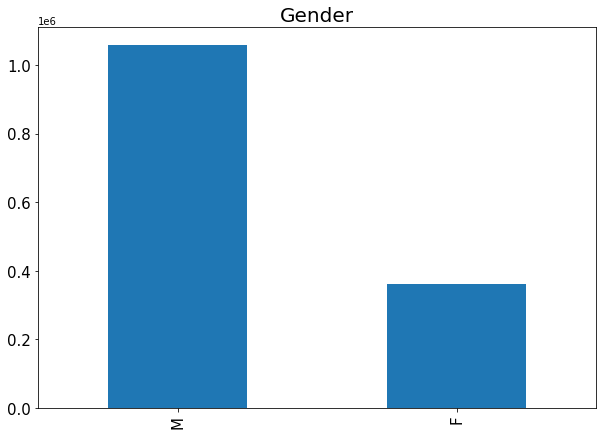

Percentage of Male lifters: 74%

M    1057092
F     362506
Name: Sex, dtype: int64


In [29]:
plt.figure(figsize=(10,7))
df['Sex'].value_counts().plot(kind='bar')
plt.title('Gender',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print('Percentage of Male lifters: {}%\n'.format(round(len(df[df['Sex']=='M'])/len(df)*100),4))
print(df['Sex'].value_counts())

##Equipamento:
Aunque el equipamento no da poderes mágicos a la hora de levantar ni te da un boost de fuerza, el utilizar aditamentos tales como vendas, faja, rodilleras, straps, etc resulta muy útil y llega  a facilitar un poco el levantamiento y en cierta medida es recomendable siempre utliziar aditamentos con el fin de prevenir alguna lesión dándole soporte a ciertas partes del cuerpo.
Veamos que aditamentos utilizan los power lifters:

In [30]:
print(df['Equipment'].value_counts())

Single-ply    785761
Raw           465804
Wraps         103206
Multi-ply      64809
Straps            18
Name: Equipment, dtype: int64


Dado que lasstraps y los wraps parecen ser lo mismo, simplemente combinemos las dos columnas.

In [31]:
df['Equipment'].replace('Straps', 'Wraps', inplace=True)
print(df['Equipment'].value_counts())



Single-ply    785761
Raw           465804
Wraps         103224
Multi-ply      64809
Name: Equipment, dtype: int64


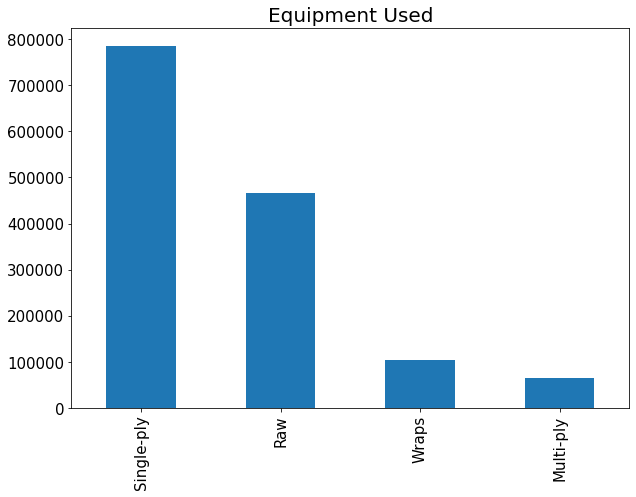

Equipment used: 

Single-ply    785761
Raw           465804
Wraps         103224
Multi-ply      64809
Name: Equipment, dtype: int64


In [32]:
#grafiquemos los valores para cada accesorio
plt.figure(figsize=(10,7))
df['Equipment'].value_counts().plot(kind='bar')
plt.title('Equipment Used',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()
print('Equipment used: \n')
print(df['Equipment'].value_counts())

#Edades de los levantadores:

In [33]:
df.groupby("Sex")['Age'].mean()

Sex
F    30.621619
M    31.795232
Name: Age, dtype: float64

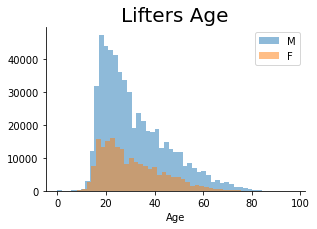

In [34]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Age',bins=50,alpha=.5)
plt.title('Lifters Age',fontsize=20)
plt.legend(loc=1)
plt.show()

## Body Weight:
Usualmente los power lifters son personas con característicsa físicas robustas con gran musculatura, veamos cómo se distribuyen los pesos corporales

In [35]:
df.groupby("Sex")["BodyweightKg"].mean()

Sex
F    68.007968
M    89.757849
Name: BodyweightKg, dtype: float64

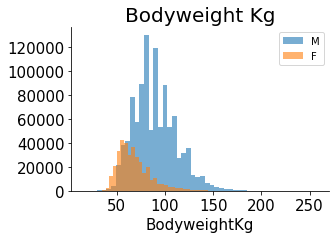

In [36]:

g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'BodyweightKg',bins=50,alpha=.6)
plt.title('Bodyweight Kg',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.legend(loc=1)
plt.show()

##Absolute Strength by Bodyweight and Equipment

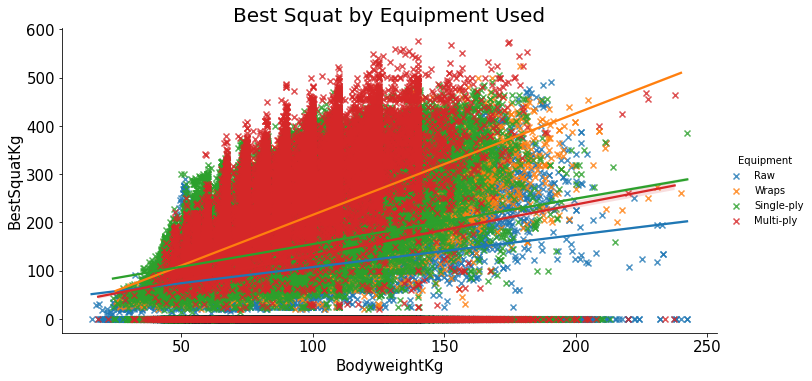

Equipment Used by Lifters:

Single-ply    785761
Raw           465804
Wraps         103224
Multi-ply      64809
Name: Equipment, dtype: int64


In [37]:
sns.lmplot(x='BodyweightKg',
           y='Best3SquatKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           aspect=2)
plt.title('Best Squat by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('BestSquatKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

Los usuarios de trajesMulti-Ply tuvieron un aumento significativo en el 


rendimiento de sentadilla. Los usuarios de trajesSingle-ply  solo mejoraron ligeramente en comparación con los usuarios de  Wraps. Los levantadores Raw en promedio tuvieron el peor rendimiento en sentadilla. Se observa una correlación positiva entre el peso corporal y el mejor levantamiento en sentadilla en kilogramos.

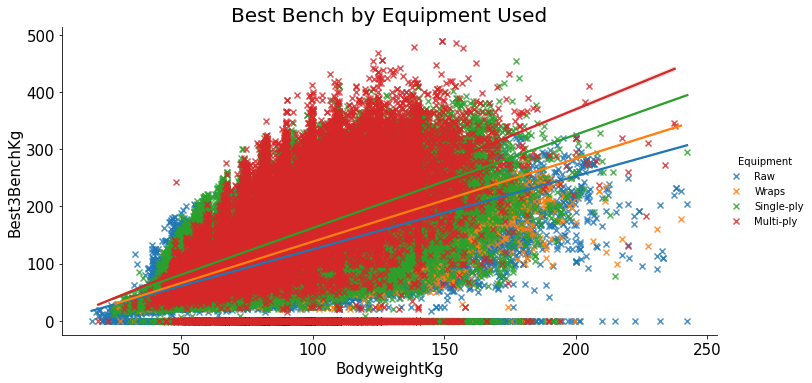

Equipment Used by Lifters:

Single-ply    785761
Raw           465804
Wraps         103224
Multi-ply      64809
Name: Equipment, dtype: int64


In [38]:
sns.lmplot(x='BodyweightKg',
           y='Best3BenchKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           aspect=2)
plt.title('Best Bench by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Best3BenchKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

Una vez más, el uso de trajes Multi-ply se encuentra en el primer lugar, seguido por trajes Single-ply y, en la parte inferior, los levantadores Raw junto con los que usan Wraps. Se observa una correlación positiva entre el peso corporal y el mejor levantamiento en banco en kilogramos

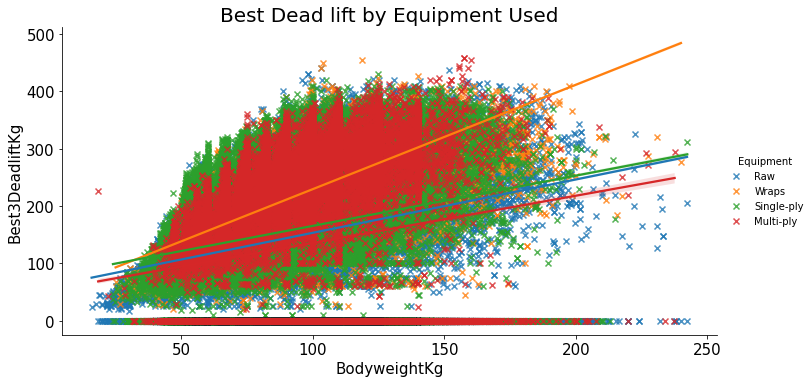

Equipment Used by Lifters:

Single-ply    785761
Raw           465804
Wraps         103224
Multi-ply      64809
Name: Equipment, dtype: int64


In [39]:
sns.lmplot(x='BodyweightKg',
           y='Best3DeadliftKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           aspect=2)
plt.title('Best Dead lift by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Best3DeadliftKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

¡Finalmente algo interesante! Aunque todas las líneas de regresión están muy juntas, las wraps y el levantamiento Raw apenas superan al traje Single-ply  y Multi-ply . Imagino que, dado que las Wraps tuvieron el mejor rendimiento, a veces el eslabón más débil al hacer peso muerto es el agarre de la barra. Interesante. Además, observe la correlación positiva entre el peso corporal y el mejor levantamiento en peso muerto en kilogramos.

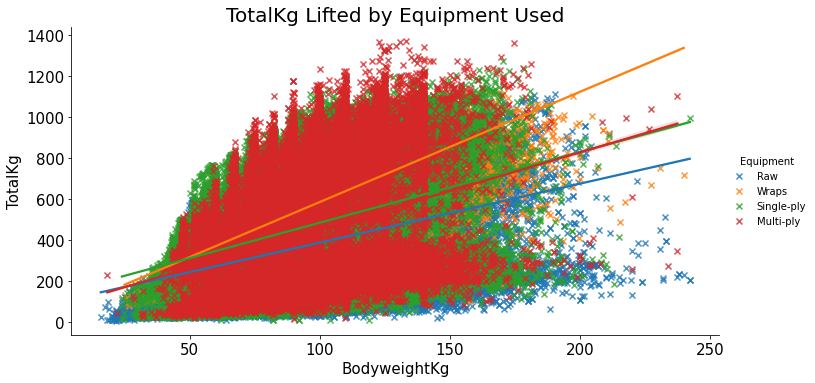

Equipment Used by Lifters:

Single-ply    785761
Raw           465804
Wraps         103224
Multi-ply      64809
Name: Equipment, dtype: int64


In [40]:
sns.lmplot(x='BodyweightKg',
           y='TotalKg',
           data=df.dropna(),
           hue='Equipment',
           markers='x',
           aspect=2)
plt.title('TotalKg Lifted by Equipment Used',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('TotalKg',fontsize=15)
plt.xlabel('BodyweightKg',fontsize=15)
plt.show()
print('Equipment Used by Lifters:\n')
print(df['Equipment'].dropna().value_counts())

## Absolute strenght by sex

Visualizaremos los datos de las 3 mejores marcas es decir, La mejor sentadilla, el mejor bench y el mejor deadlift, para ambos géneros:

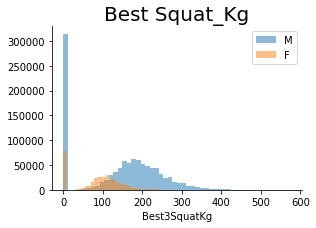

In [41]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Best3SquatKg',bins=50,alpha=.5)
plt.title('Best Squat_Kg',fontsize=20)
plt.legend(loc=1)
plt.show()

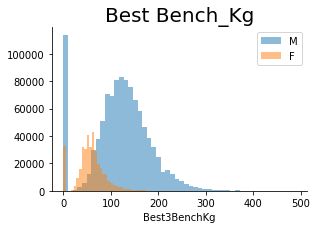

In [42]:

g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'Best3BenchKg',bins=50,alpha=.5)
plt.title('Best Bench_Kg',fontsize=20)
plt.legend(loc=1)
plt.show()


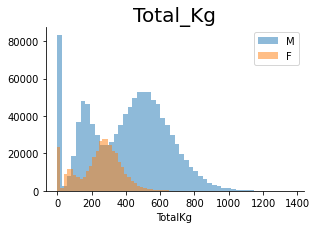

In [43]:
g = sns.FacetGrid(df,hue='Sex',aspect=1.5,legend_out=True)
g = g.map(plt.hist,'TotalKg',bins=50,alpha=.5)
plt.title('Total_Kg',fontsize=20)
plt.legend(loc=1)
plt.show()

## Los atletas más fuertes
más arriba en esta notebook calculamos la fuerza relativa para las tres pruebas, veamos quiénes son los atletas más fuertes.


## Squat by bodyweight:

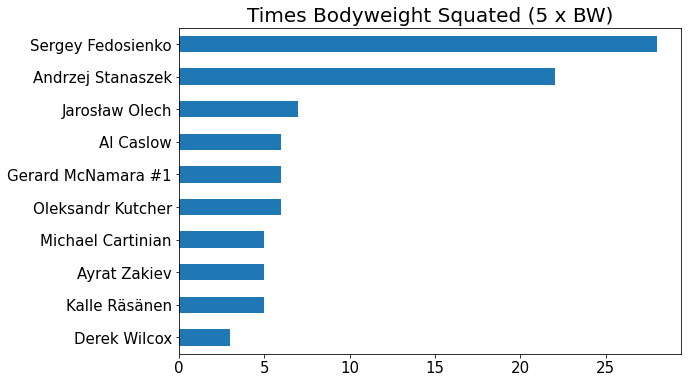

Sergey Fedosienko     28
Andrzej Stanaszek     22
Jarosław Olech         7
Oleksandr Kutcher      6
Gerard McNamara #1     6
Al Caslow              6
Kalle Räsänen          5
Ayrat Zakiev           5
Michael Cartinian      5
Derek Wilcox           3
Name: Name, dtype: int64


In [44]:
plt.figure(figsize=(9,6))
df[df['Squat / BW']>=5]['Name'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Times Bodyweight Squated (5 x BW)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print(df[df['Squat / BW']>=5]['Name'].value_counts()[:10])

## Bench by body weight:

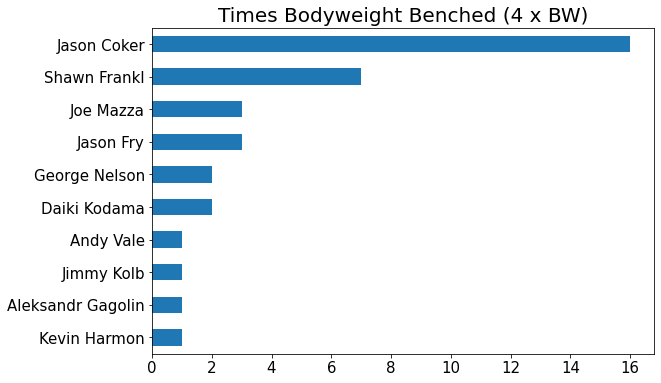

Jason Coker          16
Shawn Frankl          7
Jason Fry             3
Joe Mazza             3
Daiki Kodama          2
George Nelson         2
Kevin Harmon          1
Aleksandr Gagolin     1
Jimmy Kolb            1
Andy Vale             1
Name: Name, dtype: int64


In [45]:
plt.figure(figsize=(9,6))
df[df['Bench / BW']>=4]['Name'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Times Bodyweight Benched (4 x BW)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print(df[df['Bench / BW']>=4]['Name'].value_counts()[:10])

## Deadlift by bodyweight:

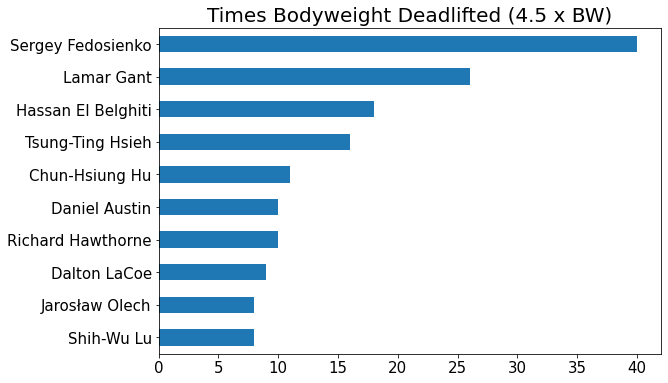

Sergey Fedosienko     40
Lamar Gant            26
Hassan El Belghiti    18
Tsung-Ting Hsieh      16
Chun-Hsiung Hu        11
Richard Hawthorne     10
Daniel Austin         10
Dalton LaCoe           9
Shih-Wu Lu             8
Jarosław Olech         8
Name: Name, dtype: int64


In [46]:
plt.figure(figsize=(9,6))
df[df['Deadlift / BW']>=4.5]['Name'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Times Bodyweight Deadlifted (4.5 x BW)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print(df[df['Deadlift / BW']>=4.5]['Name'].value_counts()[:10])

## Total by bodyweight:

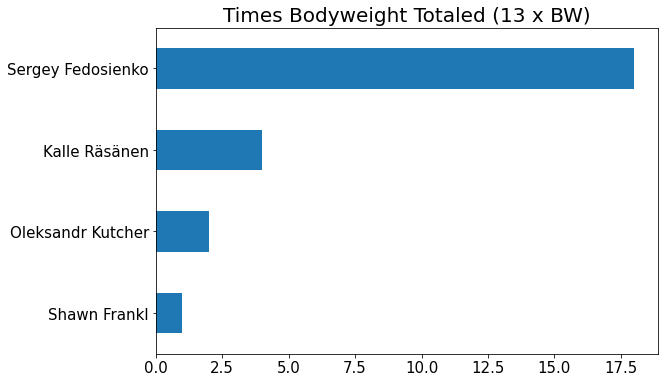

Sergey Fedosienko    18
Kalle Räsänen         4
Oleksandr Kutcher     2
Shawn Frankl          1
Name: Name, dtype: int64


In [47]:
plt.figure(figsize=(9,6))
df[df['Total / BW']>=13]['Name'].value_counts()[:10].sort_values(ascending=True).plot(kind='barh')
plt.title('Times Bodyweight Totaled (13 x BW)',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
print(df[df['Total / BW']>=13]['Name'].value_counts()[:10])